In [1056]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive/Colab Notebooks/DIC/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/DIC


# Importing libraries for Pre-processing

In [1057]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore

# Load data files

Mortality Data is neglected as it will not be relevant for our problem statement

In [1058]:
admissions_df=pd.read_csv('HDHI Admission data.csv')
pollution_df=pd.read_csv('HDHI Pollution Data.csv')
mortality_df=pd.read_csv('HDHI Mortality Data.csv')

In [1059]:
admissions_df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,04-01-2017,04-03-2017,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,04-01-2017,04-05-2017,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,04-01-2017,04-03-2017,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,04-01-2017,04-08-2017,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,04-01-2017,4/23/2017,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,31-03-2019,04-04-2019,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15753,15754,699500,3/31/2019,04-01-2019,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15754,15755,700415,31-03-2019,09-04-2019,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15755,15756,699524,31-03-2019,03-04-2019,59,F,U,O,Mar-19,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1060]:
pollution_df

,DATE,AQI,PM2.5 AVG,PM2.5 MIN,PM2.5 MAX,PM10 AVG,PM10 MIN,PM10 MAX,NO2 AVG,NO2 MIN,NO2 MAX,NH3 AVG,NH3 MIN,NH3 MAX,SO2 AVG,SO2 MIN,SO2 MAX,CO AVG,CO MIN,CO MAX,OZONE AVG,OZONE MIN,OZONE MAX,PROMINENT POLLUTENT,MAX TEMP,MIN TEMP,HUMIDITY
0,3/25/2017,75,75,45,210,74,50,110,28,40,180,3,2,3,2,1,4,34,1,49,38,21,70,PM2.5,36,18,32.0
1,3/26/2017,82,82,47,153,75,65,86,29,26,31,3,2,3,3,1,3,32,7,55,30,8,70,PM2.5,38,19,23.0
2,3/27/2017,72,72,63,150,71,45,98,38,34,40,3,3,3,7,2,15,40,10,68,26,18,53,PM2.5,40,20,14.0
3,3/28/2017,80,78,63,88,80,73,87,39,37,40,3,3,3,6,5,7,25,12,48,21,4,71,PM10,40,21,36.0
4,3/29/2017,73,64,53,75,73,63,86,38,36,41,3,2,4,5,1,8,35,20,54,32,6,56,PM10,40,23,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,3/27/2019,93,93,37,190,86,51,122,2,1,3,5,5,6,14,10,35,17,9,35,34,5,58,PM2.5,30,16,35.0
733,3/28/2019,103,103,21,190,94,70,122,2,1,3,5,5,6,14,10,35,19,10,28,54,5,58,PM2.5,31,17,32.0
734,3/29/2019,80,78,43,126,80,57,103,13,6,17,11,9,19,14,10,49,24,12,44,49,18,67,PM10,32,17,30.0
735,3/30/2019,91,91,32,173,87,49,112,13,2,51,17,9,75,16,8,36,22,10,35,41,11,71,PM2.5,33,20,20.0


# Handling outliers

Using z-score to remove outliers

In [1061]:
num_cols = pollution_df.select_dtypes(include=['int64', 'float64']).columns #getting columns with dtype as int and float

In [1062]:
z_scores = pollution_df[num_cols].apply(zscore)

In [1063]:
for col in num_cols:
    median = pollution_df[col].median() # replace outliers with median
    pollution_df[col] = np.where((z_scores[col] > 3) | (z_scores[col] < -3), median, pollution_df[col]) # replacing values which are > 3 and < -3

# Data Standardization



Formatting date to standard format throughout datasets

In [1064]:
def parse_dates(date_str):
    for fmt in ('%m/%d/%Y', '%d/%m/%Y', '%d-%m-%Y', '%m-%d-%Y'): # formats chosen
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT
admissions_df['D.O.A'] = admissions_df['D.O.A'].apply(parse_dates)
admissions_df['D.O.D'] = admissions_df['D.O.D'].apply(parse_dates)

In [1065]:
pollution_df['DATE'] = pd.to_datetime(pollution_df['DATE'])

Setting an offset of 6 months with an assumption that is a person gets exposed to pollution 6 months prior, he is most likely to be admitted because of air pollution caused disease.

In [1066]:
pollution_df['Offset_date'] = pollution_df['DATE'] + pd.DateOffset(months=6)
pollution_df['month year']=pollution_df['Offset_date'].dt.strftime('%b-%y') # format MMM-yy

In [1067]:
pollution_df

,DATE,AQI,PM2.5 AVG,PM2.5 MIN,PM2.5 MAX,PM10 AVG,PM10 MIN,PM10 MAX,NO2 AVG,NO2 MIN,NO2 MAX,NH3 AVG,NH3 MIN,NH3 MAX,SO2 AVG,SO2 MIN,SO2 MAX,CO AVG,CO MIN,CO MAX,OZONE AVG,OZONE MIN,OZONE MAX,PROMINENT POLLUTENT,MAX TEMP,MIN TEMP,HUMIDITY,Offset_date,month year
0,2017-03-25,75.0,75.0,45.0,210.0,74.0,50.0,110,28.0,40.0,180,3.0,2.0,3.0,2.0,1.0,4.0,34.0,1.0,49.0,38.0,21.0,70,PM2.5,36.0,18.0,32.0,2017-09-25,Sep-17
1,2017-03-26,82.0,82.0,47.0,153.0,75.0,65.0,86,29.0,26.0,31,3.0,2.0,3.0,3.0,1.0,3.0,32.0,7.0,55.0,30.0,8.0,70,PM2.5,38.0,19.0,23.0,2017-09-26,Sep-17
2,2017-03-27,72.0,72.0,63.0,150.0,71.0,45.0,98,38.0,34.0,40,3.0,3.0,3.0,7.0,2.0,15.0,40.0,10.0,68.0,26.0,18.0,53,PM2.5,40.0,20.0,14.0,2017-09-27,Sep-17
3,2017-03-28,80.0,78.0,63.0,88.0,80.0,73.0,87,39.0,37.0,40,3.0,3.0,3.0,6.0,5.0,7.0,25.0,12.0,48.0,21.0,4.0,71,PM10,40.0,21.0,36.0,2017-09-28,Sep-17
4,2017-03-29,73.0,64.0,53.0,75.0,73.0,63.0,86,38.0,36.0,41,3.0,2.0,4.0,5.0,1.0,8.0,35.0,20.0,54.0,32.0,6.0,56,PM10,40.0,23.0,31.0,2017-09-29,Sep-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2019-03-27,93.0,93.0,37.0,190.0,86.0,51.0,122,2.0,1.0,3,5.0,5.0,6.0,14.0,10.0,35.0,17.0,9.0,35.0,34.0,5.0,58,PM2.5,30.0,16.0,35.0,2019-09-27,Sep-19
733,2019-03-28,103.0,103.0,21.0,190.0,94.0,70.0,122,2.0,1.0,3,5.0,5.0,6.0,14.0,10.0,35.0,19.0,10.0,28.0,54.0,5.0,58,PM2.5,31.0,17.0,32.0,2019-09-28,Sep-19
734,2019-03-29,80.0,78.0,43.0,126.0,80.0,57.0,103,13.0,6.0,17,11.0,9.0,19.0,14.0,10.0,49.0,24.0,12.0,44.0,49.0,18.0,67,PM10,32.0,17.0,30.0,2019-09-29,Sep-19
735,2019-03-30,91.0,91.0,32.0,173.0,87.0,49.0,112,13.0,2.0,51,17.0,9.0,5.0,16.0,8.0,36.0,22.0,10.0,35.0,41.0,11.0,71,PM2.5,33.0,20.0,20.0,2019-09-30,Sep-19


For a particular month and year, the maximum values of pollutants detected are retained excluding the lower values

In [1068]:
columns_to_aggregate = pollution_df.columns.difference(['month year']) # exclude month year column
agg_dict = {col: 'max' for col in columns_to_aggregate} # get max value for each column
aggregated_pollution = pollution_df.groupby('month year').agg(agg_dict).reset_index() #groupby month year and calculate maximum for each month and year

Merging pollution and admissions dataset using Date and Month

In [1069]:
merged_data = pd.merge(admissions_df, aggregated_pollution, on='month year', how='left') #left join

# Handling NaN values

In [1070]:
merged_data

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN
0,1,234735,2017-01-04,2017-03-04,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,234696,2017-01-04,2017-05-04,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,234882,2017-01-04,2017-03-04,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,234635,2017-01-04,2017-08-04,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,234486,2017-01-04,2017-04-23,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15753,15754,699500,2019-03-31,2019-01-04,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15754,15755,700415,2019-03-31,2019-04-09,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15755,15756,699524,2019-03-31,2019-04-03,59,F,U,O,Mar-19,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0


In [1071]:
merged_data.isna().sum()

,0
SNO,0
MRD No.,0
D.O.A,0
D.O.D,1
AGE,0
...,...
PM2.5 MIN,2805
PROMINENT POLLUTENT,2805
SO2 AVG,2805
SO2 MAX,2805


In [1072]:
sorted_df = merged_data.sort_values(by='D.O.A') # sort in ascending based on column D.O.A

In [1073]:
sorted_df.isna().sum()

,0
SNO,0
MRD No.,0
D.O.A,0
D.O.D,1
AGE,0
...,...
PM2.5 MIN,2805
PROMINENT POLLUTENT,2805
SO2 AVG,2805
SO2 MAX,2805


Handling empty values with backward fill and forward fill

This method is reasonable as we have sorted the dataframe based on D.O.A and the values filled will be more or less near the dates.

In [1074]:
sorted_df.fillna(method='bfill', inplace=True) # fills with next non missing value in the column

<ipython-input-1074-8bd13f680d23>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sorted_df.fillna(method='bfill', inplace=True) # fills with next non missing value in the column


In [1075]:
sorted_df.fillna(method='ffill', inplace=True) # fills with previous non misisng value in the column

<ipython-input-1075-fdcda49b5585>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sorted_df.fillna(method='ffill', inplace=True) # fills with previous non misisng value in the column


In [1076]:
sorted_df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN
0,1,234735,2017-01-04,2017-03-04,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
29,30,170322,2017-01-04,2017-04-04,64,F,R,E,Apr-17,4,1,DISCHARGE,0,0,1,1,1,0,0,10.5,8,327,130,30,0.44,EMPTY,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
28,29,380206,2017-01-04,2017-04-20,70,F,U,E,Apr-17,20,18,DISCHARGE,0,0,1,1,0,0,0,8.5,0.6,32,158,39,1,EMPTY,1,37,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
26,27,161261,2017-01-04,2017-04-04,62,F,R,E,Apr-17,4,1,DISCHARGE,0,0,0,0,0,0,0,13,8.5,213,130,20,0.7,EMPTY,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
25,26,380213,2017-01-04,2017-04-21,56,M,U,O,Apr-17,21,5,DAMA,0,0,0,0,0,1,0,12,8.2,332,122,39,0.98,2160,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14524,14525,669526,2019-11-02,2019-02-13,88,M,U,E,Feb-19,3,3,EXPIRY,0,0,1,1,1,0,0,11.9,15.6,275,384,76,1.5,784,1,30,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,113.0,78.0,104.0,41.0,2018-08-31,69.0,38.0,28.0,2.0,2.0,1.0,17.0,27,16.0,63.0,95,28.0,2019-02-28,95.0,92,70.0,113.0,323.0,48.0,PM2.5,24.0,46.0,11.0
15261,15262,686710,2019-11-03,2019-03-17,52,M,R,E,Mar-19,7,7,EXPIRY,0,0,1,1,1,0,0,10.6,15.9,204,171,86,2.3,5000,0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
13670,13671,652922,2019-12-01,2019-01-16,79,M,U,E,Jan-19,5,5,EXPIRY,0,0,1,1,0,1,1,6.6,3.3,260,228,162,4.3,5000,0,16,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,116.0,75.0,126.0,36.0,2018-07-31,79.0,42.0,31.0,2.0,3.0,1.0,17.0,43,16.0,53.0,88,28.0,2019-01-31,108.0,99,79.0,116.0,500.0,56.0,PM2.5,30.0,85.0,5.0
14531,14532,670212,2019-12-02,2019-12-02,53,F,U,E,Feb-19,1,0,EXPIRY,0,0,1,1,0,0,1,13.6,27.7,367,249,131,2.6,5000,0,25,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,113.0,78.0,104.0,41.0,2018-08-31,69.0,38.0,28.0,2.0,2.0,1.0,17.0,27,16.0,63.0,95,28.0,2019-02-28,95.0,92,70.0,113.0,323.0,48.0,PM2.5,24.0,46.0,11.0


In [1077]:
sorted_df.isna().sum()

,0
SNO,0
MRD No.,0
D.O.A,0
D.O.D,0
AGE,0
...,...
PM2.5 MIN,0
PROMINENT POLLUTENT,0
SO2 AVG,0
SO2 MAX,0


In [1078]:
df = sorted_df.sort_index() # sort based on index

In [1079]:
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN
0,1,234735,2017-01-04,2017-03-04,81,M,R,E,Apr-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
1,2,234696,2017-01-04,2017-05-04,65,M,R,E,Apr-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,210,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
2,3,234882,2017-01-04,2017-03-04,53,M,U,E,Apr-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,42,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
3,4,234635,2017-01-04,2017-08-04,67,F,U,E,Apr-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,1840,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
4,5,234486,2017-01-04,2017-04-23,60,F,U,E,Apr-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98,73.0,82.0,210.0,63.0,PM2.5,7.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585,2019-03-31,2019-04-04,86,F,U,O,Mar-19,5,1,DISCHARGE,0,0,1,1,1,0,0,8.8,13.7,361,131,57,1.4,292,1,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15753,15754,699500,2019-03-31,2019-01-04,50,M,R,E,Mar-19,2,2,EXPIRY,0,0,1,1,0,1,0,13.2,15.6,142,248,94,1.8,206,0,28,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15754,15755,700415,2019-03-31,2019-04-09,82,M,U,E,Mar-19,10,5,DISCHARGE,0,0,0,1,1,0,0,9.3,11.7,372,210,67,1.9,1120,0,32,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0
15755,15756,699524,2019-03-31,2019-04-03,59,F,U,O,Mar-19,4,2,DISCHARGE,0,0,0,1,1,0,0,13.1,12.5,431,153,29,0.8,78,0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89,80.0,132.0,434.0,71.0,SO2,21.0,40.0,6.0


In [1080]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,MRD No.,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,OUTCOME,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,EF,CHEST INFECTION,NO2 MAX,OZONE MAX,PM10 MAX,PROMINENT POLLUTENT
0,234735,M,R,E,Apr-17,DISCHARGE,9.5,16.1,337,80,34,0.9,1880,35,0,46,71,98,PM2.5
1,234696,M,R,E,Apr-17,DISCHARGE,13.7,9,149,112,18,0.9,210,42,0,46,71,98,PM2.5
2,234882,M,U,E,Apr-17,DISCHARGE,10.6,14.7,329,187,93,2.3,210,42,0,46,71,98,PM2.5
3,234635,F,U,E,Apr-17,DISCHARGE,12.8,9.9,286,130,27,0.6,1840,42,0,46,71,98,PM2.5
4,234486,F,U,E,Apr-17,DISCHARGE,13.6,9.1,26,144,55,1.25,1840,16,0,46,71,98,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,699585,F,U,O,Mar-19,DISCHARGE,8.8,13.7,361,131,57,1.4,292,38,0,77,84,89,SO2
15753,699500,M,R,E,Mar-19,EXPIRY,13.2,15.6,142,248,94,1.8,206,28,0,77,84,89,SO2
15754,700415,M,U,E,Mar-19,DISCHARGE,9.3,11.7,372,210,67,1.9,1120,32,0,77,84,89,SO2
15755,699524,F,U,O,Mar-19,DISCHARGE,13.1,12.5,431,153,29,0.8,78,60,0,77,84,89,SO2


In [1081]:
object_columns.columns

Index(['MRD No.', 'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
       'month year', 'OUTCOME', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA',
       'CREATININE', 'BNP', 'EF', 'CHEST INFECTION', 'NO2 MAX', 'OZONE MAX',
       'PM10 MAX', 'PROMINENT POLLUTENT'],
      dtype='object')

Converting numeric object columns into numeric datatype and replacing string values with NaN

In [1082]:
columns = ['HB', 'TLC', 'PLATELETS', 'GLUCOSE','UREA', 'CREATININE', 'BNP', 'EF', 'CHEST INFECTION', 'NO2 MAX','OZONE MAX', 'PM10 MAX','MRD No.']
for i in columns:
  df[i] = pd.to_numeric(df[i], errors='coerce') #convert to numeric datatype int or float

Filling NaN using backward fill

In [1083]:
df.fillna(method='bfill', inplace=True) # fills with next non missing value in the column

<ipython-input-1083-dd54e1208690>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # fills with next non missing value in the column


# Handling categorical data

In [1084]:
df['GENDER']=df['GENDER'].astype("category").cat.codes
df['RURAL']=df['RURAL'].astype("category").cat.codes
df['TYPE OF ADMISSION-EMERGENCY/OPD']=df['TYPE OF ADMISSION-EMERGENCY/OPD'].astype("category").cat.codes
df['OUTCOME']=df['OUTCOME'].astype("category").cat.codes
df['PROMINENT POLLUTENT']=df['PROMINENT POLLUTENT'].astype("category").cat.codes

In [1085]:
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN
0,1,234735.0,2017-01-04,2017-03-04,81,1,0,0,Apr-17,3,2,1,0,0,1,0,0,0,0,9.5,16.1,337.0,80.0,34.0,0.90,1880.0,1,35.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
1,2,234696.0,2017-01-04,2017-05-04,65,1,0,0,Apr-17,5,2,1,0,1,0,1,1,0,0,13.7,9.0,149.0,112.0,18.0,0.90,210.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
2,3,234882.0,2017-01-04,2017-03-04,53,1,1,0,Apr-17,3,3,1,0,0,1,0,1,0,0,10.6,14.7,329.0,187.0,93.0,2.30,210.0,0,42.0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
3,4,234635.0,2017-01-04,2017-08-04,67,0,1,0,Apr-17,8,6,1,0,0,0,1,1,0,0,12.8,9.9,286.0,130.0,27.0,0.60,1840.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
4,5,234486.0,2017-01-04,2017-04-23,60,0,1,0,Apr-17,23,9,1,0,0,0,1,0,1,0,13.6,9.1,26.0,144.0,55.0,1.25,1840.0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585.0,2019-03-31,2019-04-04,86,0,1,1,Mar-19,5,1,1,0,0,1,1,1,0,0,8.8,13.7,361.0,131.0,57.0,1.40,292.0,1,38.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15753,15754,699500.0,2019-03-31,2019-01-04,50,1,0,0,Mar-19,2,2,2,0,0,1,1,0,1,0,13.2,15.6,142.0,248.0,94.0,1.80,206.0,0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15754,15755,700415.0,2019-03-31,2019-04-09,82,1,1,0,Mar-19,10,5,1,0,0,0,1,1,0,0,9.3,11.7,372.0,210.0,67.0,1.90,1120.0,0,32.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15755,15756,699524.0,2019-03-31,2019-04-03,59,0,1,1,Mar-19,4,2,1,0,0,0,1,1,0,0,13.1,12.5,431.0,153.0,29.0,0.80,78.0,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21

In [1086]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,month year
0,Apr-17
1,Apr-17
2,Apr-17
3,Apr-17
4,Apr-17
...,...
15752,Mar-19
15753,Mar-19
15754,Mar-19
15755,Mar-19


In [1087]:
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN
0,1,234735.0,2017-01-04,2017-03-04,81,1,0,0,Apr-17,3,2,1,0,0,1,0,0,0,0,9.5,16.1,337.0,80.0,34.0,0.90,1880.0,1,35.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
1,2,234696.0,2017-01-04,2017-05-04,65,1,0,0,Apr-17,5,2,1,0,1,0,1,1,0,0,13.7,9.0,149.0,112.0,18.0,0.90,210.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
2,3,234882.0,2017-01-04,2017-03-04,53,1,1,0,Apr-17,3,3,1,0,0,1,0,1,0,0,10.6,14.7,329.0,187.0,93.0,2.30,210.0,0,42.0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
3,4,234635.0,2017-01-04,2017-08-04,67,0,1,0,Apr-17,8,6,1,0,0,0,1,1,0,0,12.8,9.9,286.0,130.0,27.0,0.60,1840.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
4,5,234486.0,2017-01-04,2017-04-23,60,0,1,0,Apr-17,23,9,1,0,0,0,1,0,1,0,13.6,9.1,26.0,144.0,55.0,1.25,1840.0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585.0,2019-03-31,2019-04-04,86,0,1,1,Mar-19,5,1,1,0,0,1,1,1,0,0,8.8,13.7,361.0,131.0,57.0,1.40,292.0,1,38.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15753,15754,699500.0,2019-03-31,2019-01-04,50,1,0,0,Mar-19,2,2,2,0,0,1,1,0,1,0,13.2,15.6,142.0,248.0,94.0,1.80,206.0,0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15754,15755,700415.0,2019-03-31,2019-04-09,82,1,1,0,Mar-19,10,5,1,0,0,0,1,1,0,0,9.3,11.7,372.0,210.0,67.0,1.90,1120.0,0,32.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0
15755,15756,699524.0,2019-03-31,2019-04-03,59,0,1,1,Mar-19,4,2,1,0,0,0,1,1,0,0,13.1,12.5,431.0,153.0,29.0,0.80,78.0,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21

# Setting the target variable

The columns chosen for target varaiable setting is chest infection, pulmonary embolism, AF, heart failure and SSS. Other columns used are PM2, PM10 and NO2.
The target variable is set to 1 only when PM2 > 35, PM10 > 150 and NO2 > 100.

In [1088]:
PM2_5_THRESHOLD = 35
PM10_THRESHOLD = 150
NO2_THRESHOLD = 100

respiratory_conditions = [
    'CHEST INFECTION', 'PULMONARY EMBOLISM', 'AF',
    'HEART FAILURE', 'SSS']
df['Air_Pollution_Admission'] = 0
for index, row in df.iterrows():
    has_respiratory_issue = any(row[condition] == 1 for condition in respiratory_conditions)
    high_pollution = (
        row['PM2.5 AVG'] > PM2_5_THRESHOLD or
        row['PM10 AVG'] > PM10_THRESHOLD or
        row['NO2 AVG'] > NO2_THRESHOLD
    )
    if has_respiratory_issue and high_pollution:
        df.at[index, 'Air_Pollution_Admission'] = 1 # sets target variable column to 1 if the respiratory conditions are present and the values are above the threshold

In [1089]:
df

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,AQI,CO AVG,CO MAX,CO MIN,DATE,HUMIDITY,MAX TEMP,MIN TEMP,NH3 AVG,NH3 MAX,NH3 MIN,NO2 AVG,NO2 MAX,NO2 MIN,OZONE AVG,OZONE MAX,OZONE MIN,Offset_date,PM10 AVG,PM10 MAX,PM10 MIN,PM2.5 AVG,PM2.5 MAX,PM2.5 MIN,PROMINENT POLLUTENT,SO2 AVG,SO2 MAX,SO2 MIN,Air_Pollution_Admission
0,1,234735.0,2017-01-04,2017-03-04,81,1,0,0,Apr-17,3,2,1,0,0,1,0,0,0,0,9.5,16.1,337.0,80.0,34.0,0.90,1880.0,1,35.0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0,1
1,2,234696.0,2017-01-04,2017-05-04,65,1,0,0,Apr-17,5,2,1,0,1,0,1,1,0,0,13.7,9.0,149.0,112.0,18.0,0.90,210.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0,0
2,3,234882.0,2017-01-04,2017-03-04,53,1,1,0,Apr-17,3,3,1,0,0,1,0,1,0,0,10.6,14.7,329.0,187.0,93.0,2.30,210.0,0,42.0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0,1
3,4,234635.0,2017-01-04,2017-08-04,67,0,1,0,Apr-17,8,6,1,0,0,0,1,1,0,0,12.8,9.9,286.0,130.0,27.0,0.60,1840.0,0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0,0
4,5,234486.0,2017-01-04,2017-04-23,60,0,1,0,Apr-17,23,9,1,0,0,0,1,0,1,0,13.6,9.1,26.0,144.0,55.0,1.25,1840.0,0,16.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,82.0,42.0,72.0,20.0,2017-03-31,36.0,41.0,23.0,3.0,4.0,3.0,40.0,46,40.0,38.0,71,21.0,2017-09-30,80.0,98.0,73.0,82.0,210.0,63.0,0,7.0,15.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15752,15753,699585.0,2019-03-31,2019-04-04,86,0,1,1,Mar-19,5,1,1,0,0,1,1,1,0,0,8.8,13.7,361.0,131.0,57.0,1.40,292.0,1,38.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0,0
15753,15754,699500.0,2019-03-31,2019-01-04,50,1,0,0,Mar-19,2,2,2,0,0,1,1,0,1,0,13.2,15.6,142.0,248.0,94.0,1.80,206.0,0,28.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0,0
15754,15755,700415.0,2019-03-31,2019-04-09,82,1,1,0,Mar-19,10,5,1,0,0,0,1,1,0,0,9.3,11.7,372.0,210.0,67.0,1.90,1120.0,0,32.0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019-03-30,109.0,89.0,80.0,132.0,434.0,71.0,1,21.0,40.0,6.0,1
15755,15756,699524.0,2019-03-31,2019-04-03,59,0,1,1,Mar-19,4,2,1,0,0,0,1,1,0,0,13.1,12.5,431.0,153.0,29.0,0.80,78.0,0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,132.0,52.0,84.0,46.0,2018-09-30,76.0,36.0,26.0,8.0,13.0,6.0,35.0,77,30.0,52.0,84,28.0,2019

In [1090]:
df.dtypes

,0
SNO,int64
MRD No.,float64
D.O.A,datetime64[ns]
D.O.D,datetime64[ns]
AGE,int64
...,...
PROMINENT POLLUTENT,int8
SO2 AVG,float64
SO2 MAX,float64
SO2 MIN,float64


# Saving the preprocessed data

In [1091]:
df.to_csv('merged_data.csv', index=False)

# Data Visualisation - EDA


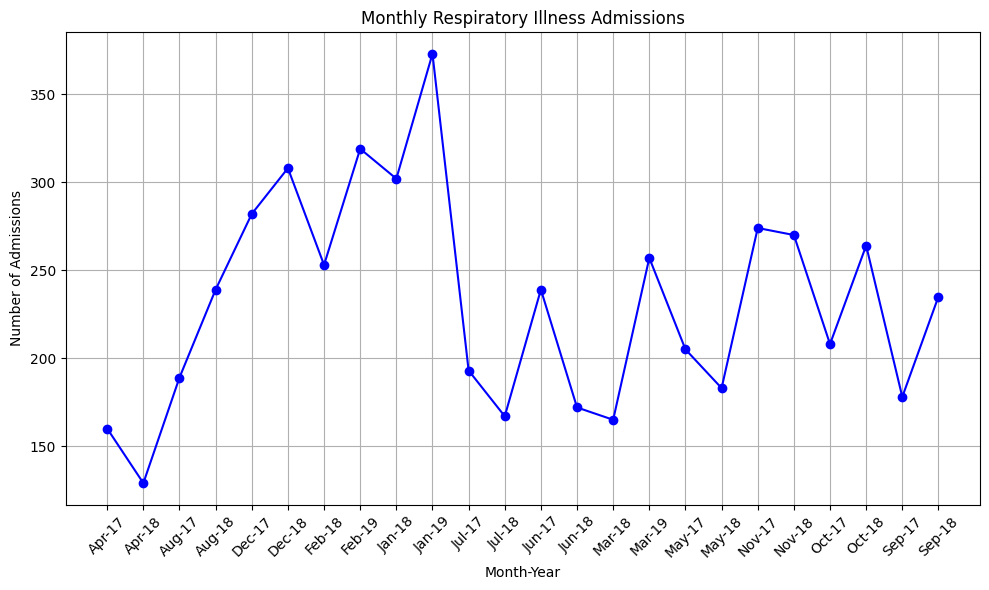

In [1092]:
admission_counts = df.groupby('month year')['Air_Pollution_Admission'].sum().reset_index() # group based on month year

plt.figure(figsize=(10, 6))
plt.plot(admission_counts['month year'], admission_counts['Air_Pollution_Admission'], marker='o', linestyle='-', color='b')
plt.title('Monthly Respiratory Illness Admissions')
plt.xlabel('Month-Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

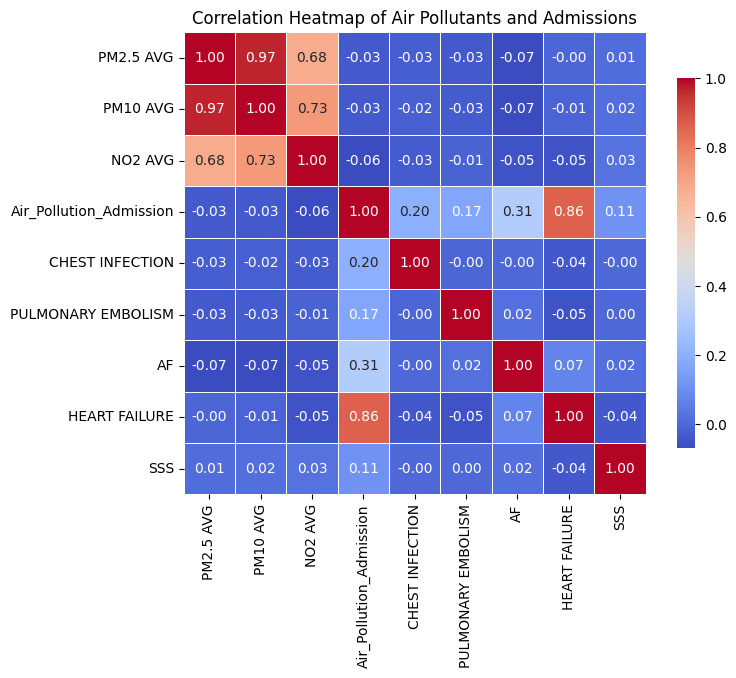

In [1093]:
# Correlation matrix which gives details about the relationship/correlation percentage between columns in the dataset
df_plot=df[['PM2.5 AVG', 'PM10 AVG', 'NO2 AVG', 'Air_Pollution_Admission','CHEST INFECTION', 'PULMONARY EMBOLISM', 'AF','HEART FAILURE', 'SSS']]
correlation_matrix = df_plot.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title('Correlation Heatmap of Air Pollutants and Admissions')
plt.show()

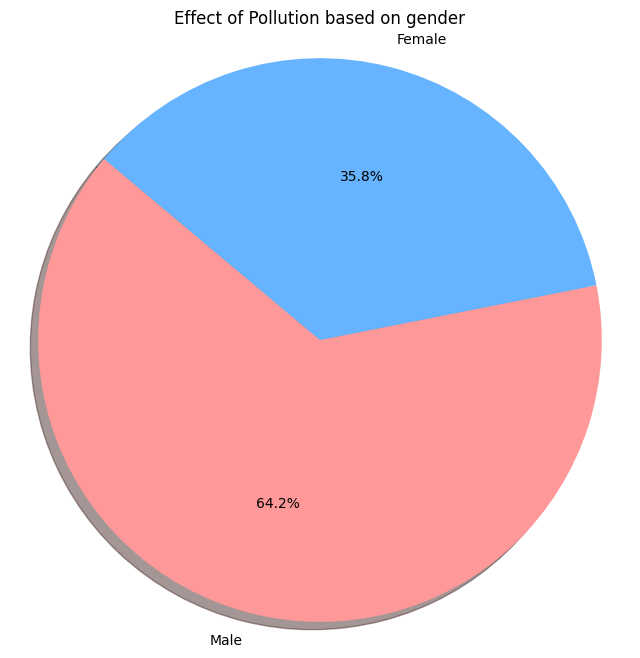

In [1094]:
plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff']
labels = ['Male', 'Female']
explode = (0, 0)
values = df[['GENDER','Air_Pollution_Admission']].sum().values # count of patients based on gender
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Effect of Pollution based on gender')
plt.show()

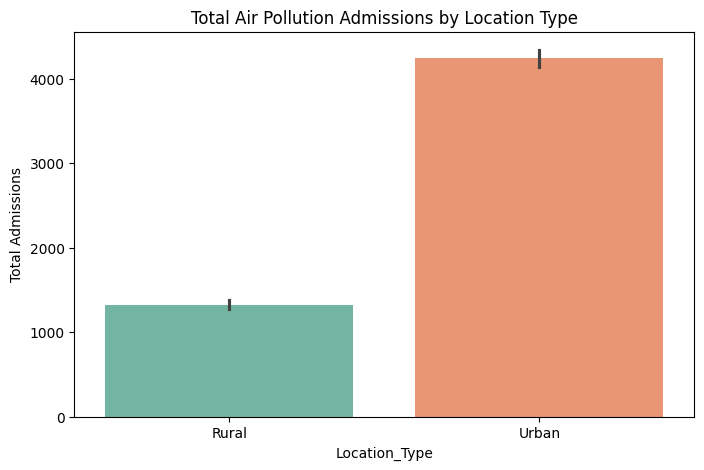

In [1095]:
df_plot = df
for i in df_plot.columns:
  if df_plot[i].dtypes == 'datetime64[ns]':
    df_plot[i] = df_plot[i].astype(str) # converting date to string datatype


df_plot['Location_Type'] = df_plot['RURAL'].replace({0: 'Rural', 1: 'Urban'}) # group by location and get admissions count
df_plot = df_plot.groupby('Location_Type').sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Location_Type', y='Air_Pollution_Admission', data=df, hue='Location_Type', estimator=sum, palette='Set2')
plt.title('Total Air Pollution Admissions by Location Type')
plt.ylabel('Total Admissions')
plt.show()


<Figure size 1200x600 with 0 Axes>

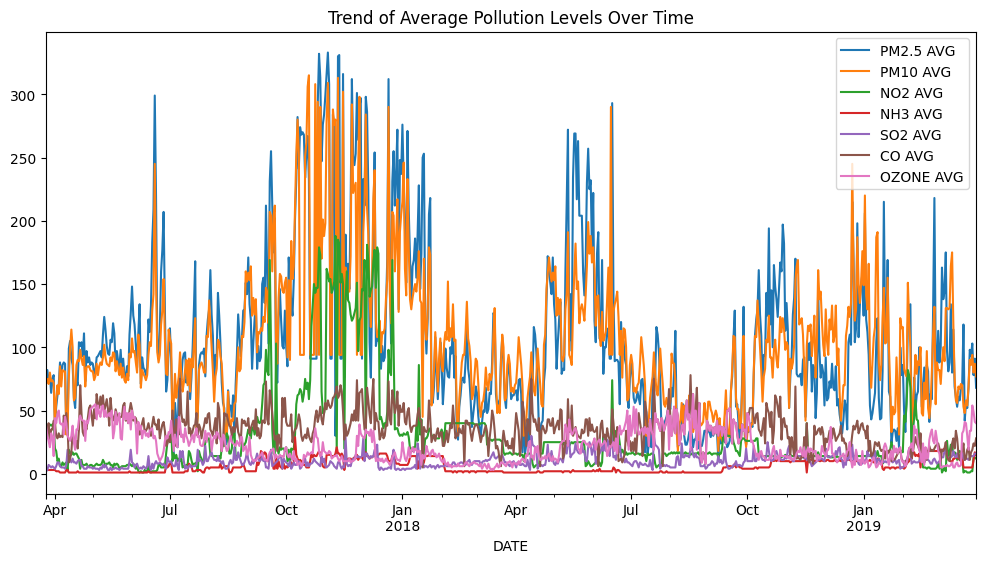

In [1096]:
plt.figure(figsize=(12, 6))
pollution_df.groupby('DATE')[['PM2.5 AVG', 'PM10 AVG', 'NO2 AVG' ,'NH3 AVG','SO2 AVG','CO AVG','OZONE AVG']].mean().plot(kind='line', figsize=(12, 6)) # levels of different pollutants over the years
plt.title('Trend of Average Pollution Levels Over Time')
plt.show()

In [1097]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'OUTCOME', 'SMOKING ', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF',
       'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
       'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
       'PULMONARY EMBOLISM', 'CHEST INFECTION', 'AQI', 'CO AVG', 'CO MAX',
       'CO MIN', 'DATE', 'HUMIDITY', 'MAX TEMP', 'MIN TEMP', 'NH3 AVG',
       'NH3 MAX', 'NH3 MIN', 'NO2 AVG', 'NO2 MAX', 'NO2 MIN', 'OZONE AVG',
       'OZONE MAX', 'OZONE MIN', 'Offset_

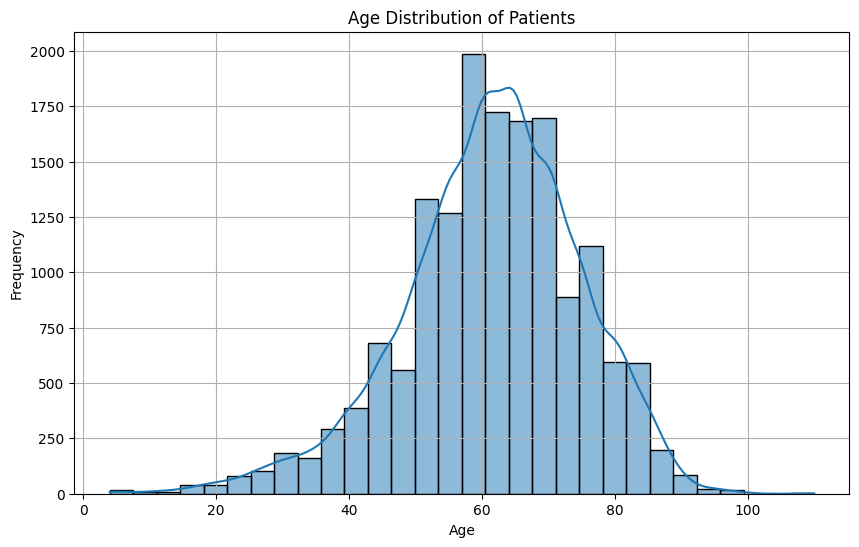

In [1098]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=30, kde=True) # Age distributuion of the admitted patients
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()

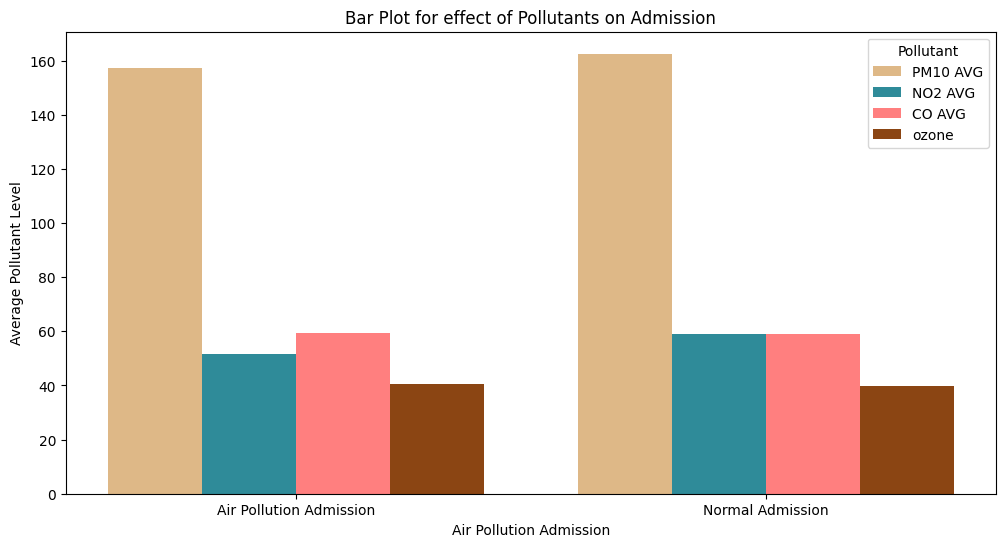

In [1099]:
plt.figure(figsize=(12, 6))
df_plot = df.copy()
df_plot['Air_Pollution_Admission'] = df_plot['Air_Pollution_Admission'].replace({0: 'Normal Admission', 1: 'Air Pollution Admission'}) # setting 0 as normal admission and 1 as air pollution admission
x = np.arange(len(df_plot['Air_Pollution_Admission'].unique()))
width = 0.2


plt.bar(x - width*1.5, df_plot.groupby('Air_Pollution_Admission')['PM10 AVG'].mean(),width, label='PM10 AVG', color='#DEB887')
plt.bar(x - width/2, df_plot.groupby('Air_Pollution_Admission')['NO2 AVG'].mean(),width, label='NO2 AVG', color='#2F8B99')
plt.bar(x + width/2, df_plot.groupby('Air_Pollution_Admission')['CO AVG'].mean(), width, label='CO AVG', color='#FF7F7F')
plt.bar(x + width*1.5, df_plot.groupby('Air_Pollution_Admission')['OZONE AVG'].mean(),width, label='ozone', color='#8B4513')

plt.title('Bar Plot for effect of Pollutants on Admission')
plt.xlabel('Air Pollution Admission')
plt.ylabel('Average Pollutant Level')
plt.legend(title='Pollutant', loc='upper right')
plt.xticks(x, df_plot['Air_Pollution_Admission'].unique())
plt.show()

# Phase 2


# Importing libraries

In [986]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Loading dataset

In [987]:
df = pd.read_csv('merged_data.csv')

In [988]:
df.dtypes

,0
SNO,int64
MRD No.,float64
D.O.A,object
D.O.D,object
AGE,int64
...,...
PROMINENT POLLUTENT,int64
SO2 AVG,float64
SO2 MAX,float64
SO2 MIN,float64


# Handling categorical data

In [989]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [990]:
df.dtypes

,0
SNO,int64
MRD No.,float64
D.O.A,int64
D.O.D,int64
AGE,int64
...,...
PROMINENT POLLUTENT,int64
SO2 AVG,float64
SO2 MAX,float64
SO2 MIN,float64


# Splitting data into X and Y

In [991]:
X = df.drop(columns=['Air_Pollution_Admission']) # exclude target variable
y = df['Air_Pollution_Admission'] # only target variable

# Splitting the data into train, test and validation set (70:15:15)

In [992]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y) # dividing dataset into 70% train and 30% test
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42,stratify=y_test) # dividing testing into 15% test and 15% val

# Normalizing X values

In [993]:
scaler = StandardScaler() # normalize X values
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [994]:
X_train = X_train_scaled
X_val = X_val_scaled
X_test = X_test_scaled

# Random Forest Classifier

In [1038]:
rf_model = RandomForestClassifier(
    n_estimators=50,           # Fewer trees to reduce complexity
    max_depth=3,               # Shallow trees to reduce overfitting
    min_samples_split=3,
    min_samples_leaf=4,        # Larger minimum leaf size
    max_features='sqrt',       # Limit features considered for splitting
    random_state=24,
    class_weight="balanced"    # Automatically adjust for class imbalance
)

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Evaluation Metrics

In [1039]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 0.94
Test Accuracy: 0.94


In [1040]:
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      1529
           1       1.00      0.83      0.91       835

    accuracy                           0.94      2364
   macro avg       0.96      0.91      0.93      2364
weighted avg       0.94      0.94      0.94      2364

Test Confusion Matrix:
[[1528    1]
 [ 142  693]]


In [1041]:
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_test_pred)

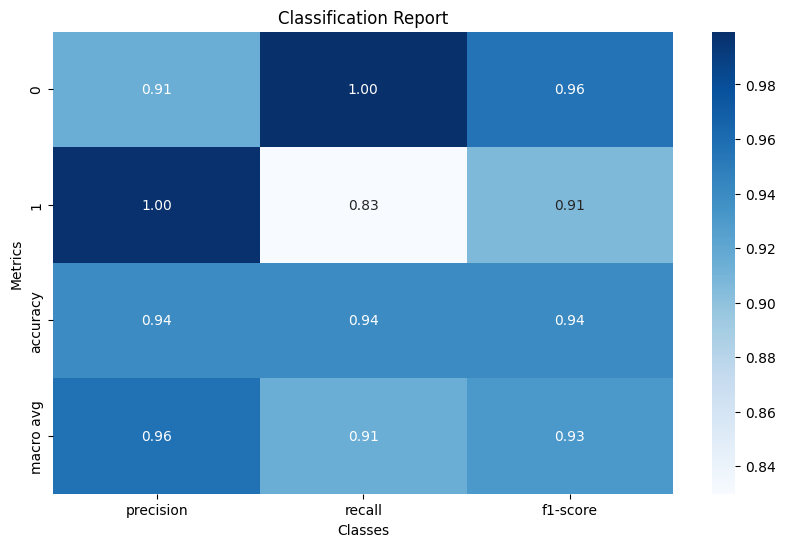

In [1042]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

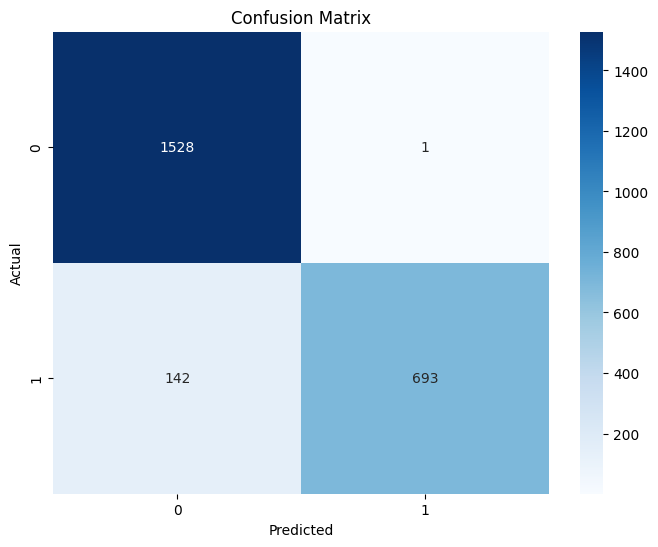

In [1043]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

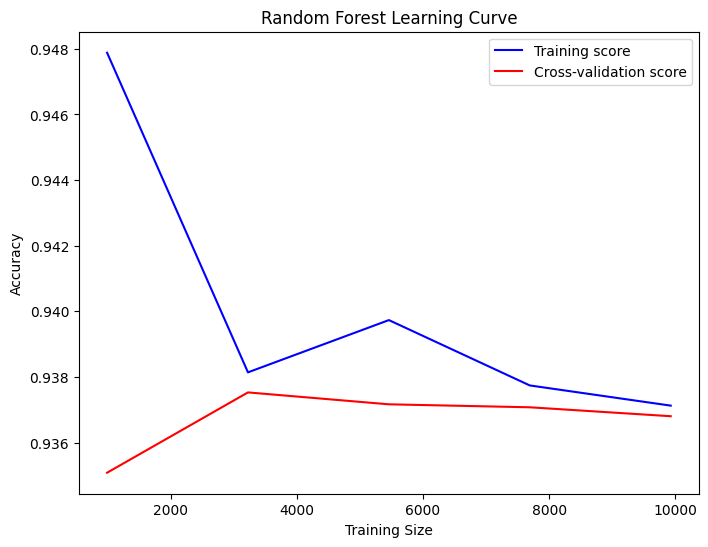

In [1044]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=10, scoring="accuracy") #learning curve for the model using cross fold where number of folds = 10

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="red")
plt.title("Random Forest Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# KNN Model

In [1045]:
knn_model = KNeighborsClassifier(n_neighbors=2) #number of centroids = 2 i.e., k=2
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_val_pred = knn_model.predict(X_val)

# Evaluation Metrics

In [1046]:
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Valuation Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")

Testing Accuracy: 0.91
Valuation Accuracy: 0.91


In [1047]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1529
           1       0.98      0.76      0.86       835

    accuracy                           0.91      2364
   macro avg       0.93      0.88      0.90      2364
weighted avg       0.92      0.91      0.91      2364

Confusion Matrix:
[[1519   10]
 [ 197  638]]


In [1048]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_pred)

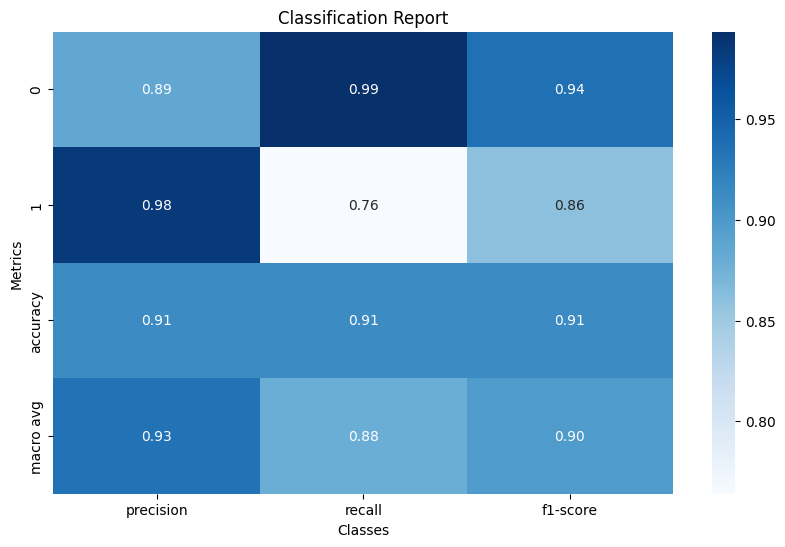

In [1049]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

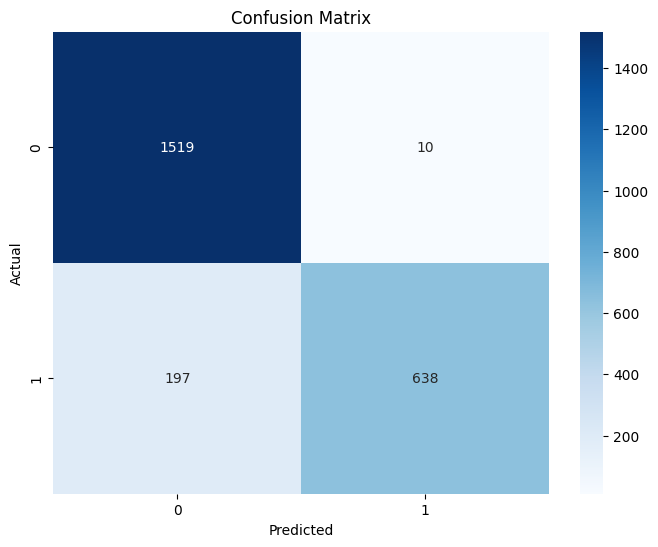

In [1050]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

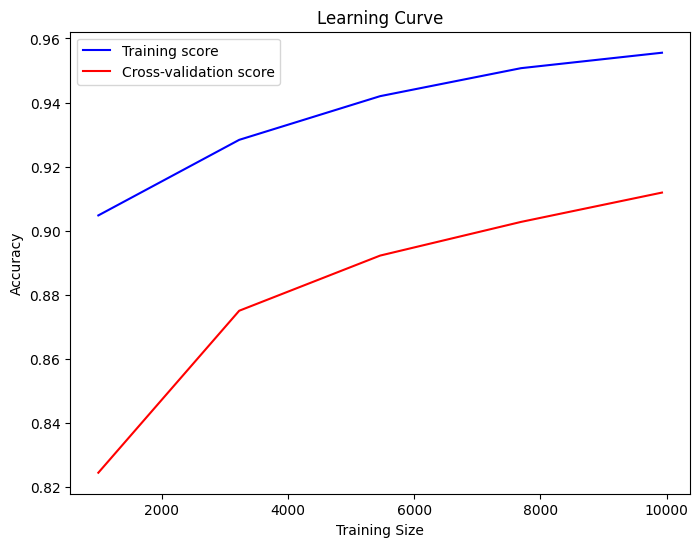

In [1051]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train, y_train, cv=10, scoring="accuracy") #learning curve for the model using cross fold where number of folds = 10

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="red")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Logistic Regression Model

In [1009]:
lr_model = LogisticRegression(
    penalty='l2', #l2 regularization
    C=0.0001,   # strenght of regularization
    solver='lbfgs', # optimizer is Limited-memory BFGS
    random_state=24,
    class_weight='balanced', # Automatically adjust for class imbalance
    max_iter=1000 # maximum iterations
)

best_val_accuracy = 0
patience = 5 # after 5 reduction in values of val loss, the training stops
patience_counter = 0

for iteration in range(1, 101): # 100 epochs
    lr_model.fit(X_train, y_train)
    y_val_pred = lr_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1

    print(f"Iteration {iteration} - Validation Accuracy: {val_accuracy:.4f}")
    if patience_counter >= patience:
        print("Early stopping triggered.")
        break

y_val_pred = lr_model.predict(X_val)
y_test_pred = lr_model.predict(X_test)


Iteration 1 - Validation Accuracy: 0.9611
Iteration 2 - Validation Accuracy: 0.9611
Iteration 3 - Validation Accuracy: 0.9611
Iteration 4 - Validation Accuracy: 0.9611
Iteration 5 - Validation Accuracy: 0.9611
Iteration 6 - Validation Accuracy: 0.9611
Early stopping triggered.


# Evaluation Metrics

In [1010]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9611
Test Accuracy: 0.9619


In [1011]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1529
           1       0.97      0.92      0.94       835

    accuracy                           0.96      2364
   macro avg       0.96      0.95      0.96      2364
weighted avg       0.96      0.96      0.96      2364

Confusion Matrix:
[[1502   27]
 [  63  772]]


In [1012]:
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_test_pred)

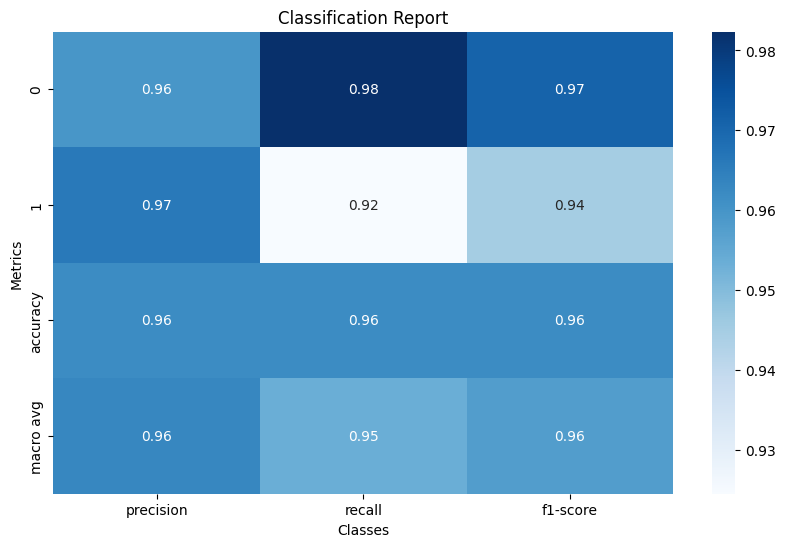

In [1013]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

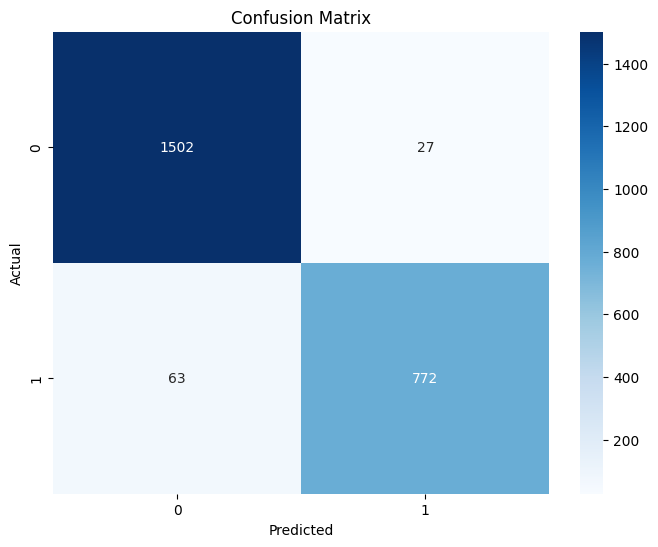

In [1014]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

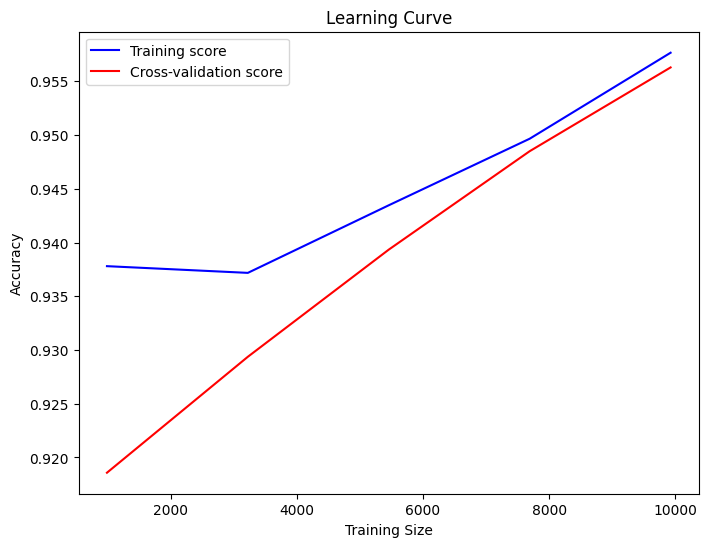

In [1015]:
train_sizes, train_scores, test_scores = learning_curve(lr_model, X_train, y_train, cv=10, scoring="accuracy") #learning curve for the model using cross fold where number of folds = 10

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="red")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Gaussian Naive Bayes Model

In [1016]:
gauss_model = GaussianNB(var_smoothing=1e-1) # small constant to the variance of each feature

gauss_model.fit(X_train, y_train)

y_val_pred = gauss_model.predict(X_val)
y_test_pred = gauss_model.predict(X_test)

# Evaluation Metrics

In [1017]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9585
Test Accuracy: 0.9569


In [1018]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1529
           1       0.89      1.00      0.94       835

    accuracy                           0.96      2364
   macro avg       0.95      0.97      0.95      2364
weighted avg       0.96      0.96      0.96      2364

Confusion Matrix:
[[1430   99]
 [   3  832]]


In [1019]:
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_test_pred)

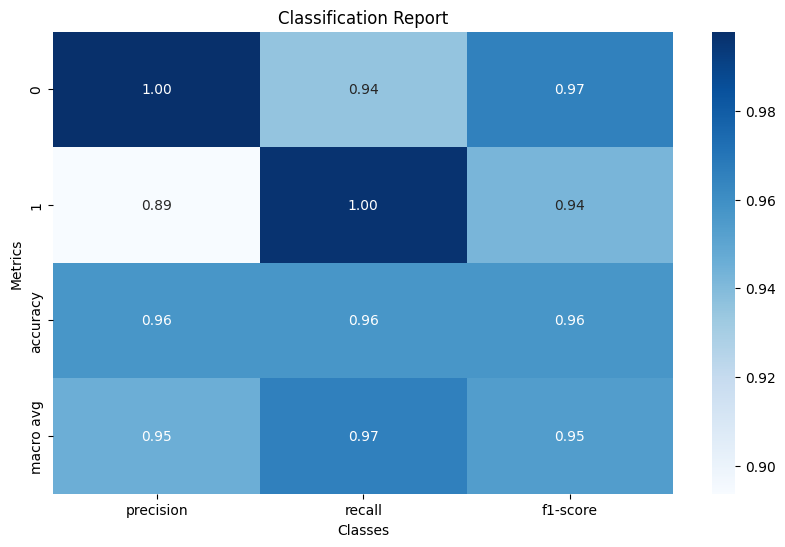

In [1020]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

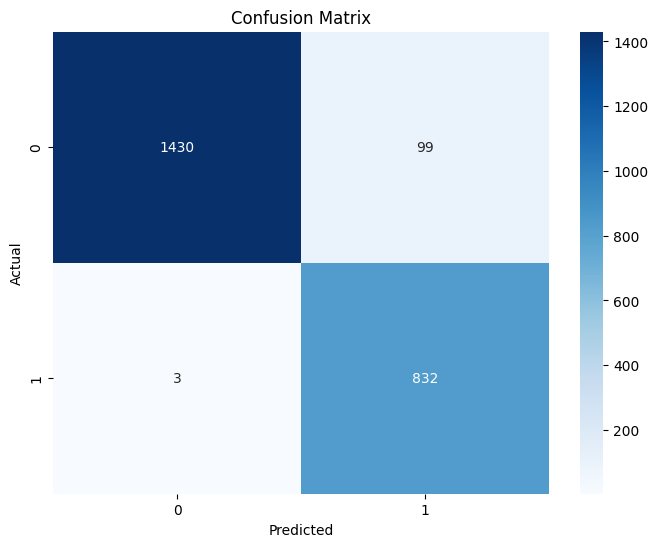

In [1021]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

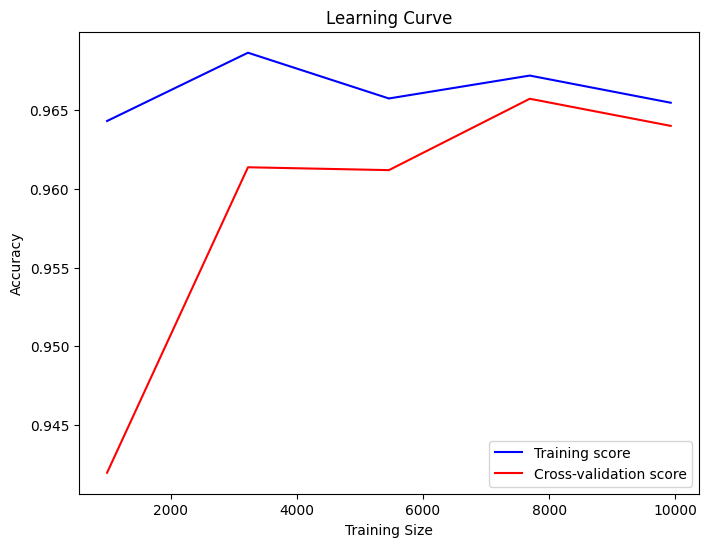

In [1022]:
train_sizes, train_scores, test_scores = learning_curve(gauss_model, X_train, y_train, cv=10, scoring="accuracy") #learning curve for the model using cross fold where number of folds = 10

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="red")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Gradient Boosting Classifier

In [1023]:
gb_model = GradientBoostingClassifier(
    random_state=42,
    max_depth=3, # maximum depth of each decision tree
    n_estimators=50, # number of trees
    learning_rate=0.01, # The step size for updating the predictions after each tree
    subsample=0.8  # fraction of the training data used to train each tre
)
gb_model.fit(X_train, y_train)

y_val_pred = gb_model.predict(X_val)
y_test_pred = gb_model.predict(X_test)

# Evaluation Metrics

In [1024]:
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9797
Test Accuracy: 0.9810


In [1025]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1529
           1       1.00      0.95      0.97       835

    accuracy                           0.98      2364
   macro avg       0.99      0.97      0.98      2364
weighted avg       0.98      0.98      0.98      2364

Confusion Matrix:
[[1529    0]
 [  45  790]]


In [1026]:
report = classification_report(y_test, y_test_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

cm = confusion_matrix(y_test, y_test_pred)

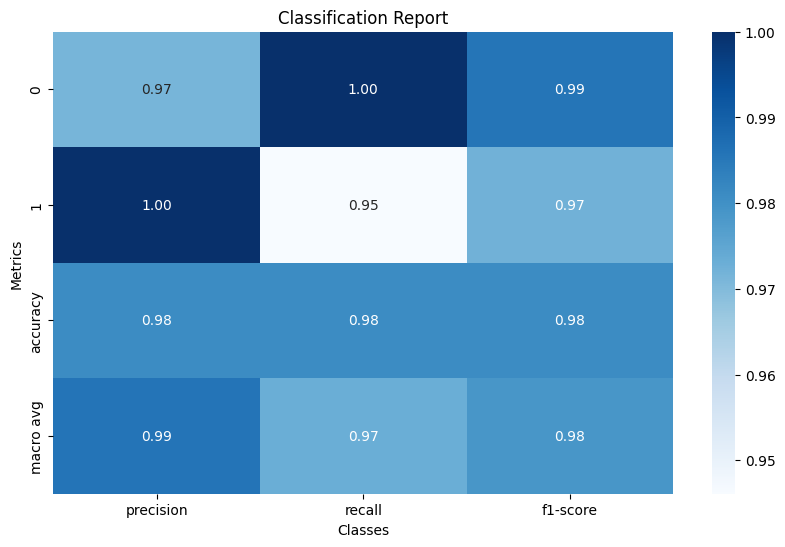

In [1027]:
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
plt.title("Classification Report")
plt.ylabel("Metrics")
plt.xlabel("Classes")
plt.show()

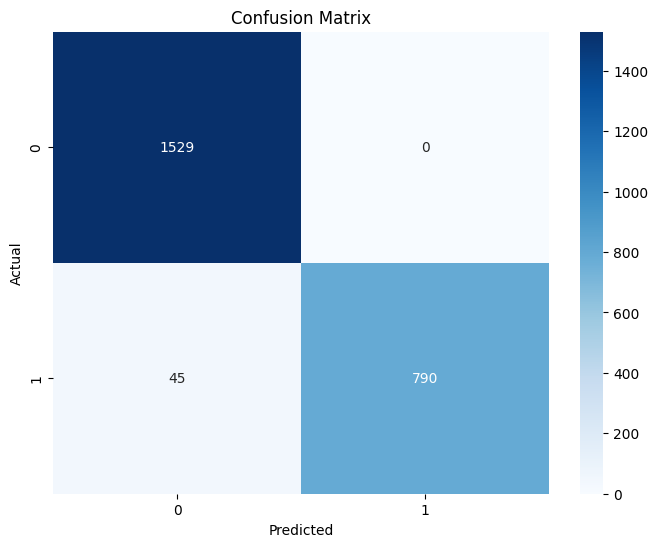

In [1028]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

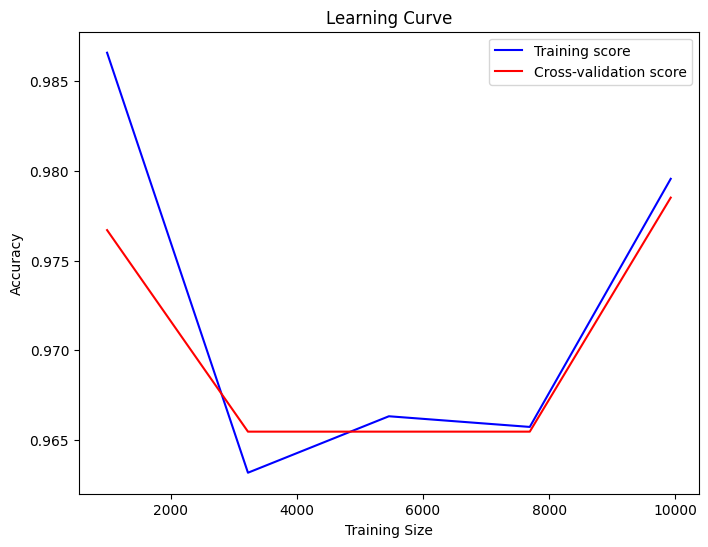

In [1029]:
train_sizes, train_scores, test_scores = learning_curve(gb_model, X_train, y_train, cv=10, scoring="accuracy") #learning curve for the model using cross fold where number of folds = 10

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color="blue")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Cross-validation score", color="red")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
